In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torch.optim.lr_scheduler import OneCycleLR
from tqdm import tqdm
from multiprocessing import freeze_support

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:

# Transformations
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# Split train into train and validation
val_size = int(0.1 * len(train_set))
train_size = len(train_set) - val_size
train_set, val_set = torch.utils.data.random_split(train_set, [train_size, val_size])

print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_set)}")

batch_size = 256
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:12<00:00, 13.2MB/s]


Training set size: 45000
Validation set size: 5000
Test set size: 10000


In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn_features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 32, kernel_size=3, padding='same'),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding='same'),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding='same'),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding='same'),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding='same'),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding='same'),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),
        )
        self.classify=nn.Sequential(
            nn.Linear(256*4*4, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )
    def forward(self, x):
        x=self.cnn_features(x)
        x=x.view((x.size(0),-1))
        x=self.classify(x)
        return x
cnn_model = CNN().to(device)

Epoch 1/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.31it/s]


Epoch 1: Train Loss: 1.6519, Train Acc: 39.05%, Val Loss: 1.4388, Val Acc: 47.76%


Epoch 2/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.31it/s]


Epoch 2: Train Loss: 1.2077, Train Acc: 56.78%, Val Loss: 1.1256, Val Acc: 60.38%


Epoch 3/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.38it/s]


Epoch 3: Train Loss: 1.0056, Train Acc: 64.43%, Val Loss: 1.0053, Val Acc: 65.80%


Epoch 4/50 [CNN]: 100%|██████████| 176/176 [00:39<00:00,  4.42it/s]


Epoch 4: Train Loss: 0.8979, Train Acc: 68.41%, Val Loss: 0.8379, Val Acc: 70.22%


Epoch 5/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.38it/s]


Epoch 5: Train Loss: 0.8336, Train Acc: 71.01%, Val Loss: 1.1975, Val Acc: 62.22%


Epoch 6/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.33it/s]


Epoch 6: Train Loss: 0.7796, Train Acc: 73.00%, Val Loss: 0.6930, Val Acc: 75.98%


Epoch 7/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.33it/s]


Epoch 7: Train Loss: 0.7288, Train Acc: 74.78%, Val Loss: 0.7272, Val Acc: 74.70%


Epoch 8/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.31it/s]


Epoch 8: Train Loss: 0.6915, Train Acc: 76.30%, Val Loss: 0.8230, Val Acc: 72.68%


Epoch 9/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.35it/s]


Epoch 9: Train Loss: 0.6469, Train Acc: 77.75%, Val Loss: 0.9868, Val Acc: 67.98%


Epoch 10/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.35it/s]


Epoch 10: Train Loss: 0.6167, Train Acc: 78.97%, Val Loss: 0.6145, Val Acc: 78.76%


Epoch 11/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.32it/s]


Epoch 11: Train Loss: 0.5949, Train Acc: 79.97%, Val Loss: 0.6144, Val Acc: 79.98%


Epoch 12/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.35it/s]


Epoch 12: Train Loss: 0.5686, Train Acc: 80.89%, Val Loss: 0.5613, Val Acc: 80.94%


Epoch 13/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.35it/s]


Epoch 13: Train Loss: 0.5489, Train Acc: 81.58%, Val Loss: 0.5765, Val Acc: 80.38%


Epoch 14/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.30it/s]


Epoch 14: Train Loss: 0.5281, Train Acc: 82.04%, Val Loss: 0.5743, Val Acc: 80.28%


Epoch 15/50 [CNN]: 100%|██████████| 176/176 [00:41<00:00,  4.23it/s]


Epoch 15: Train Loss: 0.5029, Train Acc: 82.73%, Val Loss: 0.5957, Val Acc: 80.50%


Epoch 16/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.40it/s]


Epoch 16: Train Loss: 0.4814, Train Acc: 83.65%, Val Loss: 0.5120, Val Acc: 82.64%


Epoch 17/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.30it/s]


Epoch 17: Train Loss: 0.4572, Train Acc: 84.61%, Val Loss: 0.4438, Val Acc: 84.96%


Epoch 18/50 [CNN]: 100%|██████████| 176/176 [00:39<00:00,  4.44it/s]


Epoch 18: Train Loss: 0.4454, Train Acc: 84.92%, Val Loss: 0.4221, Val Acc: 85.84%


Epoch 19/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.35it/s]


Epoch 19: Train Loss: 0.4348, Train Acc: 85.17%, Val Loss: 0.4895, Val Acc: 83.48%


Epoch 20/50 [CNN]: 100%|██████████| 176/176 [00:39<00:00,  4.44it/s]


Epoch 20: Train Loss: 0.4182, Train Acc: 85.86%, Val Loss: 0.4612, Val Acc: 84.08%


Epoch 21/50 [CNN]: 100%|██████████| 176/176 [00:39<00:00,  4.43it/s]


Epoch 21: Train Loss: 0.4060, Train Acc: 86.21%, Val Loss: 0.4087, Val Acc: 85.66%


Epoch 22/50 [CNN]: 100%|██████████| 176/176 [00:39<00:00,  4.44it/s]


Epoch 22: Train Loss: 0.3925, Train Acc: 86.76%, Val Loss: 0.3852, Val Acc: 86.94%


Epoch 23/50 [CNN]: 100%|██████████| 176/176 [00:39<00:00,  4.40it/s]


Epoch 23: Train Loss: 0.3875, Train Acc: 86.85%, Val Loss: 0.3975, Val Acc: 85.90%


Epoch 24/50 [CNN]: 100%|██████████| 176/176 [00:39<00:00,  4.40it/s]


Epoch 24: Train Loss: 0.3686, Train Acc: 87.42%, Val Loss: 0.3934, Val Acc: 87.22%


Epoch 25/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.39it/s]


Epoch 25: Train Loss: 0.3599, Train Acc: 87.88%, Val Loss: 0.3601, Val Acc: 88.06%


Epoch 26/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.33it/s]


Epoch 26: Train Loss: 0.3438, Train Acc: 88.28%, Val Loss: 0.3992, Val Acc: 86.80%


Epoch 27/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.36it/s]


Epoch 27: Train Loss: 0.3317, Train Acc: 88.62%, Val Loss: 0.3535, Val Acc: 88.12%


Epoch 28/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.38it/s]


Epoch 28: Train Loss: 0.3234, Train Acc: 88.96%, Val Loss: 0.3573, Val Acc: 88.78%


Epoch 29/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.37it/s]


Epoch 29: Train Loss: 0.3107, Train Acc: 89.50%, Val Loss: 0.3603, Val Acc: 88.04%


Epoch 30/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.37it/s]


Epoch 30: Train Loss: 0.3030, Train Acc: 89.65%, Val Loss: 0.3396, Val Acc: 89.06%


Epoch 31/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.38it/s]


Epoch 31: Train Loss: 0.2909, Train Acc: 90.06%, Val Loss: 0.3676, Val Acc: 88.14%


Epoch 32/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.36it/s]


Epoch 32: Train Loss: 0.2799, Train Acc: 90.26%, Val Loss: 0.3322, Val Acc: 89.40%


Epoch 33/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.40it/s]


Epoch 33: Train Loss: 0.2638, Train Acc: 90.84%, Val Loss: 0.3114, Val Acc: 89.24%


Epoch 34/50 [CNN]: 100%|██████████| 176/176 [00:41<00:00,  4.27it/s]


Epoch 34: Train Loss: 0.2551, Train Acc: 91.16%, Val Loss: 0.3090, Val Acc: 89.70%


Epoch 35/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.38it/s]


Epoch 35: Train Loss: 0.2423, Train Acc: 91.83%, Val Loss: 0.3038, Val Acc: 90.22%


Epoch 36/50 [CNN]: 100%|██████████| 176/176 [00:42<00:00,  4.15it/s]


Epoch 36: Train Loss: 0.2318, Train Acc: 91.95%, Val Loss: 0.3158, Val Acc: 89.38%


Epoch 37/50 [CNN]: 100%|██████████| 176/176 [00:41<00:00,  4.25it/s]


Epoch 37: Train Loss: 0.2203, Train Acc: 92.49%, Val Loss: 0.2942, Val Acc: 90.70%


Epoch 38/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.37it/s]


Epoch 38: Train Loss: 0.2086, Train Acc: 92.68%, Val Loss: 0.2760, Val Acc: 90.84%


Epoch 39/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.34it/s]


Epoch 39: Train Loss: 0.2007, Train Acc: 93.06%, Val Loss: 0.2670, Val Acc: 91.58%


Epoch 40/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.31it/s]


Epoch 40: Train Loss: 0.1896, Train Acc: 93.34%, Val Loss: 0.2704, Val Acc: 91.26%


Epoch 41/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.35it/s]


Epoch 41: Train Loss: 0.1749, Train Acc: 94.02%, Val Loss: 0.2577, Val Acc: 91.62%


Epoch 42/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.31it/s]


Epoch 42: Train Loss: 0.1736, Train Acc: 94.03%, Val Loss: 0.2648, Val Acc: 91.72%


Epoch 43/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.34it/s]


Epoch 43: Train Loss: 0.1605, Train Acc: 94.57%, Val Loss: 0.2780, Val Acc: 91.42%


Epoch 44/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.36it/s]


Epoch 44: Train Loss: 0.1545, Train Acc: 94.58%, Val Loss: 0.2540, Val Acc: 91.76%


Epoch 45/50 [CNN]: 100%|██████████| 176/176 [00:41<00:00,  4.29it/s]


Epoch 45: Train Loss: 0.1489, Train Acc: 94.93%, Val Loss: 0.2662, Val Acc: 91.80%


Epoch 46/50 [CNN]: 100%|██████████| 176/176 [00:39<00:00,  4.43it/s]


Epoch 46: Train Loss: 0.1433, Train Acc: 95.04%, Val Loss: 0.2671, Val Acc: 91.84%


Epoch 47/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.32it/s]


Epoch 47: Train Loss: 0.1444, Train Acc: 94.93%, Val Loss: 0.2599, Val Acc: 91.98%


Epoch 48/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.36it/s]


Epoch 48: Train Loss: 0.1371, Train Acc: 95.12%, Val Loss: 0.2541, Val Acc: 91.98%


Epoch 49/50 [CNN]: 100%|██████████| 176/176 [00:40<00:00,  4.31it/s]


Epoch 49: Train Loss: 0.1380, Train Acc: 95.25%, Val Loss: 0.2541, Val Acc: 92.40%


Epoch 50/50 [CNN]: 100%|██████████| 176/176 [00:41<00:00,  4.29it/s]


Epoch 50: Train Loss: 0.1302, Train Acc: 95.46%, Val Loss: 0.2499, Val Acc: 92.10%
Finished Training


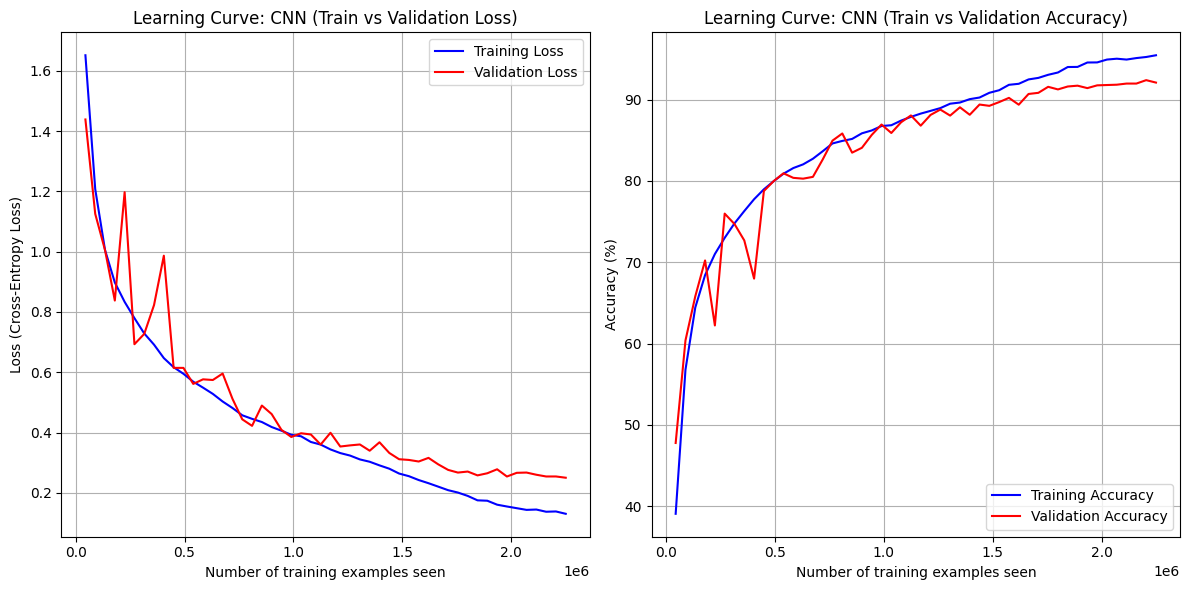

In [11]:
def evaluate_model(model, loader, criterion):
    model.eval()
    loss_cnt = 0.0
    accuracy = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            output = model(images)
            loss = criterion(output, labels)

            loss_cnt += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()

    loss = loss_cnt / len(loader)
    acc = 100 * accuracy / total
    return loss, acc
# Train model
def train_model(model, train_loader, val_loader, num_epochs=50, model_name='Model'):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
    # OneCycleLR scheduler
    scheduler = OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=num_epochs)

    train_counter = []
    train_losses = []
    train_accs = []

    val_counter = []
    val_losses= []
    val_accs = []

    # Early Stopping parameters
    best_val_acc = -1.0
    epochs_no_improve = 0
    limit_epoch = 10 # The limited epoches in which the epoches have no improvement compared with the previous one

    for epoch in range(num_epochs):
        model.train()
        loss_cnt = 0.0
        accuracy= 0
        total= 0

        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [{model_name}]'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss_val = criterion(outputs, labels)
            optimizer.zero_grad()
            loss_val.backward()
            optimizer.step()

            scheduler.step()
            loss_cnt+= loss_val.item()
            _, predicted = torch.max(outputs.data, 1)
            total+= labels.size(0)
            accuracy += (predicted == labels).sum().item()

        epoch_train_loss = loss_cnt / len(train_loader)
        epoch_train_acc = 100 * accuracy / total
        train_losses.append(epoch_train_loss)
        train_accs.append(epoch_train_acc)
        train_counter.append((epoch + 1) * len(train_loader.dataset))

        val_loss, val_acc = evaluate_model(model, val_loader, criterion)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        val_counter.append((epoch + 1) * len(train_loader.dataset))

        print(f'Epoch {epoch+1}: Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

        # Early Stopping Check
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == limit_epoch:
                print(f"Stop after {limit_epoch} epochs with no improvement.")
                break

    print(f"Finished Training")

    # Plotting Learning Curves (Loss)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(train_counter, train_losses, color='blue', label='Training Loss')
    plt.plot(val_counter, val_losses, color='red', label='Validation Loss')
    plt.legend(loc='upper right')
    plt.xlabel('Number of training examples seen')
    plt.ylabel('Loss (Cross-Entropy Loss)')
    plt.title(f'Learning Curve: {model_name} (Train vs Validation Loss)')
    plt.grid(True)
    # Plotting Learning Curves (Accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(train_counter, train_accs, color='blue', label='Training Accuracy')
    plt.plot(val_counter, val_accs, color='red', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.xlabel('Number of training examples seen')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Learning Curve: {model_name} (Train vs Validation Accuracy)')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'{model_name}_Learning_curves_loss_acc.png')
    plt.show()

    return model
freeze_support()
num_epochs = 50
cnn_model = train_model(cnn_model, train_loader, val_loader, num_epochs=num_epochs, model_name='CNN')


 Evaluation for CNN on test set...
CNN Test Loss: 0.2373, Test Accuracy: 92.40%


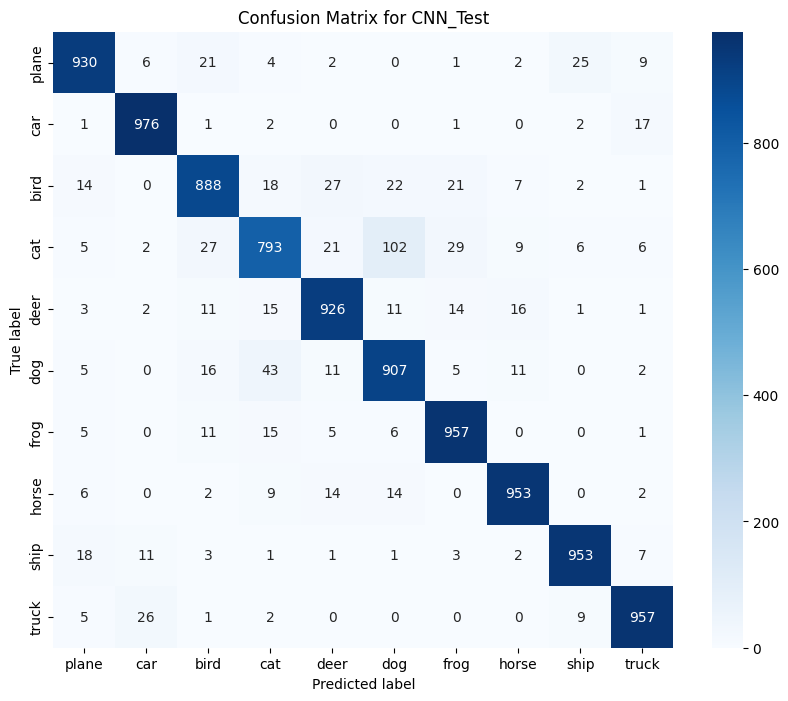

In [12]:
def plot_confusion_matrix(all_labels, all_preds, classes, model_name="Model"):
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.savefig(f'{model_name}_Confusion_matrix.png')
    plt.show()

criterion = nn.CrossEntropyLoss()
# Evaluate CNN on test set
print("\n Evaluation for CNN on test set...")
cnn_preds= []
cnn_labels = []
cnn_model.eval()
loss_cnt = 0.0
accuracy = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss_cnt += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        accuracy += (predicted == labels).sum().item()
        total += labels.size(0)
        cnn_preds.extend(predicted.cpu().numpy())
        cnn_labels.extend(labels.cpu().numpy())
test_loss = loss_cnt / len(test_loader)
test_acc = 100 * accuracy/total
print(f"CNN Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")
plot_confusion_matrix(cnn_labels,cnn_preds, classes, model_name='CNN_Test')

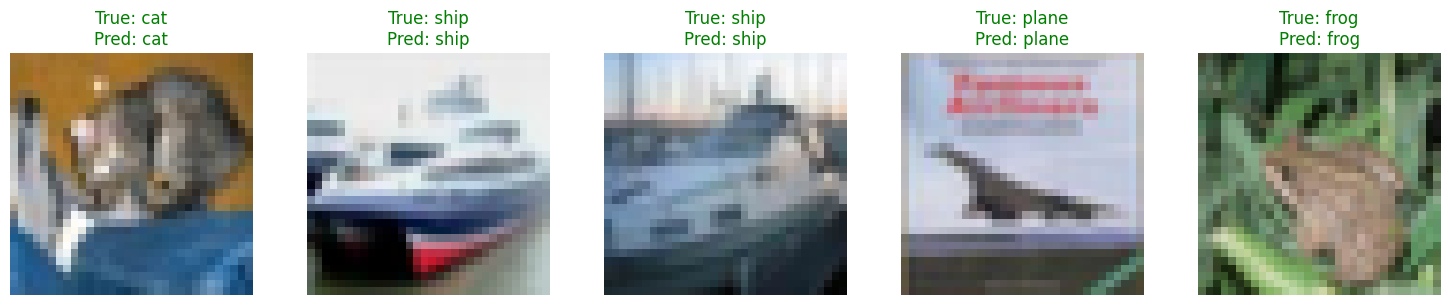

In [13]:
# Predict and display images
def predict_images(images, model, num_images=5):
    fig = plt.figure(figsize=(15, 3))
    for i in range(num_images):
        img, label = images[i]
        img_tensor = img.unsqueeze(0).to(device)
        with torch.no_grad():
            model.eval()
            out = model(img_tensor)
            _, preds = torch.max(out, dim=1)

        # Show images
        ax = fig.add_subplot(1, num_images, i+1)
        img_show = img.permute(1, 2, 0).numpy()
        img_show = img_show * 0.5 + 0.5
        ax.imshow(img_show)
        ax.axis('off')

        # Show label and prediction
        pred_class = classes[preds[0].item()]
        true_class = classes[label]
        color = 'green' if pred_class == true_class else 'red'
        ax.set_title(f'True: {true_class}\nPred: {pred_class}', color=color)

    plt.tight_layout()
    plt.show()
test_images_for_pred = [test_set[i] for i in range(5)]
predict_images(test_images_for_pred, cnn_model)
